<a href="https://colab.research.google.com/github/kartoone/nn3/blob/main/colab/chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/kartoone/nn3"
import sys
sys.path.insert(1, "/content/nn3/src")

Cloning into 'nn3'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 137 (delta 17), reused 15 (delta 8), pack-reused 109
Receiving objects: 100% (137/137), 94.29 MiB | 17.33 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Updating files: 100% (102/102), done.


In [1]:
# No longer necessary to change directory into the src directory b/c we have added it to the colab python import path
# %cd nn3/src/

/content/nn3/src


In [2]:
from network2 import Network
from network2 import QuadraticCost
import numpy as np
#import mnist_loader

# NOTE: I opened up the code for load_data_wrapper to see EXACTLY how he was encoding the training_data and test_data
# THEN: I verified that everything looked exactly the same.
# KEY POINT: Both the training_data and test_data NEED to be a regular Python list of tuples.
#          : The tricky part is that for the training data, both the input and the "label" need to be numpy arrays
#          : But for the test data, only the input is a numpy array and the "label" needs to be a regular number
#training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
#print(training_data[0][0])
#print(test_data[0][1])

our_training_data = [ ( np.array([1]),  np.array([0]) ) ]
our_test_data = [ ( np.array([1]), 0 ) ]
#print(our_training_data[0][1])
#print(our_test_data[0][1])

net = Network([1, 1],cost=QuadraticCost)
net.weights[0][0][0] = 0.6
net.biases[0][0][0] = 0.9

# note that SGD can return the training cost after each epoch, so we don't need to do this in a loop!
# instead, just set the number of epochs to 300 and monitor_training_cost=True
# note that I commented out a print inside network2.py that was printing the training cost every epoch
cost = net.SGD(our_training_data, 300, 1, 0.15, evaluation_data=our_test_data, monitor_training_cost=True)[2]

# print all 300 costs (the measured cost after each epoch)
print(cost)

[0.3297166361363805, 0.3250714335575769, 0.3202771250498675, 0.31533308998883125, 0.3102394586631111, 0.30499720648382234, 0.29960824804679126, 0.2940755284845444, 0.2884031090843573, 0.2825962437285898, 0.2766614423735209, 0.2706065175678535, 0.26444060996931273, 0.2581741889927527, 0.2518190251539068, 0.2453881313835242, 0.23889567158096248, 0.23235683593225248, 0.22578768398371593, 0.21920495805717702, 0.21262587120965945, 0.20606787545459662, 0.19954841724311848, 0.19308468813246996, 0.18669337904843308, 0.18039044652225936, 0.1741908987396012, 0.16810860821862392, 0.1621561565219658, 0.15634471472287537, 0.15068396153046687, 0.1451820391767276, 0.13984554550999498, 0.1346795593314948, 0.12968769492441487, 0.12487218099301654, 0.1202339588516095, 0.11577279464987975, 0.111487400641267, 0.10737556093209294, 0.10343425772459823, 0.09965979472381085, 0.09604791506110706, 0.09259391175210327, 0.0892927293205653, 0.08613905576210558, 0.08312740448030341, 0.0802521862003612, 0.0775077711

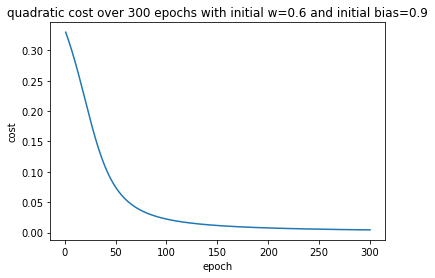

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(1,301),cost)
ax.set_title("quadratic cost over 300 epochs with initial w=0.6 and initial bias=0.9")
ax.set_ylabel("cost")
ax.set_xlabel("epoch")
plt.show()

In [4]:
from network2 import Network
from network2 import QuadraticCost
import numpy as np

our_training_data = [(np.array([1]),np.array([0]))]
our_test_data = [([[1]],0)]

net = Network([1, 1],cost=QuadraticCost)
net.weights[0][0][0] = 2.0
net.biases[0][0][0] = 2.0

cost = net.SGD(our_training_data, 300, 1, 0.15, evaluation_data=our_test_data, monitor_training_cost=True)[2]

print(cost)

[0.48208506449181576, 0.48199369096665307, 0.48190140823805705, 0.48180820295507787, 0.48171406150856994, 0.48161897002501397, 0.48152291436016303, 0.481425880092506, 0.48132785251654464, 0.48122881663587613, 0.4811287571560757, 0.4810276584773719, 0.48092550468710704, 0.4808222795519789, 0.4807179665100508, 0.4806125486625278, 0.480506008765285, 0.48039832922014697, 0.4802894920659018, 0.48017947896904617, 0.4800682712142494, 0.4799558496945285, 0.4798421949011213, 0.47972728691305, 0.47961110538636254, 0.4794936295430398, 0.4793748381595587, 0.479254709555097, 0.47913322157936716, 0.47901035160006655, 0.47888607648993, 0.4787603726133685, 0.4786332158126811, 0.4785045813938236, 0.4783744441117148, 0.47824277815506905, 0.47810955713073033, 0.47797475404749507, 0.47783834129940006, 0.47770029064845837, 0.47756057320681916, 0.47741915941833213, 0.4772760190394922, 0.4771311211197402, 0.4769844339810944, 0.4768359251970902, 0.4766855615709926, 0.476533309113264, 0.4763791330182474, 0.476

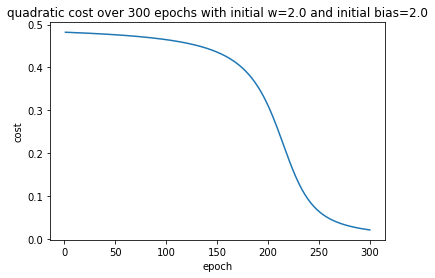

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(1,301),cost)
ax.set_title("quadratic cost over 300 epochs with initial w=2.0 and initial bias=2.0")
ax.set_ylabel("cost")
ax.set_xlabel("epoch")
plt.show()

In [6]:
from network2 import Network
from network2 import CrossEntropyCost
import numpy as np

our_training_data = [(np.array([1]),np.array([0]))]
our_test_data = [([[1]],0)]

net = Network([1, 1],cost=CrossEntropyCost) # could omit cost b/c crossentropy is the default!
net.weights[0][0][0] = 0.6
net.biases[0][0][0] = 0.9
cost1 = net.SGD(our_training_data, 300, 1, 0.15, evaluation_data=our_test_data, monitor_training_cost=True)[2]

net = Network([1, 1],cost=CrossEntropyCost) # could omit cost b/c crossentropy is the default!
net.weights[0][0][0] = 2.0
net.biases[0][0][0] = 2.0
cost2 = net.SGD(our_training_data, 300, 1, 0.15, evaluation_data=our_test_data, monitor_training_cost=True)[2]

print(cost1)
print(cost2)

[1.505605821404808, 1.3288721797543652, 1.1716011057478086, 1.0334160607151757, 0.9132686313983618, 0.8096213674324733, 0.7206627945768003, 0.6445027257394177, 0.579318103003717, 0.5234428558876961, 0.4754102510465518, 0.4339617760616245, 0.3980359465795041, 0.3667471680858818, 0.33936124550667973, 0.3152713119345084, 0.29397603143188905, 0.2750607685878428, 0.2581817810206708, 0.2430531833262409, 0.2294363123052881, 0.2171311047134048, 0.20596912776453655, 0.1958079501275221, 0.18652659217943623, 0.1780218417852783, 0.17020526312350556, 0.16300076051307846, 0.15634258727166625, 0.15017371218876666, 0.1444444741549619, 0.13911146971152744, 0.1341366295197165, 0.12948644861625194, 0.12513134232284867, 0.12104510521305366, 0.11720445492506018, 0.11358864609210062, 0.11017914243613823, 0.10695933728700349, 0.10391431456574257, 0.10103064369986914, 0.09829620309144804, 0.09570002769290155, 0.0932321770044682, 0.09088362042623548, 0.08864613740420241, 0.08651223022573357, 0.0844750476623992

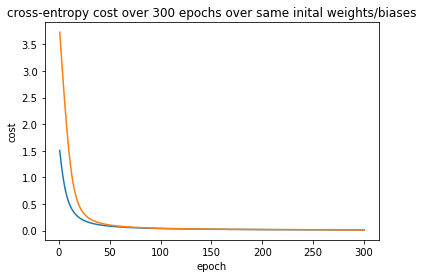

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(1,301),cost1)
ax.plot(range(1,301),cost2)
ax.set_title("cross-entropy cost over 300 epochs over same inital weights/biases")
ax.set_ylabel("cost")
ax.set_xlabel("epoch")
plt.show()